<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Juan Pablo Jorquera;201573533-6</h3>
    <h3 align="center">David Medel;201573548-4</h3>
    <h3 align="center">Diciembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 31 de diciembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea. El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Ley de Zipf y NLP (30p)


#### Zipf

La ley de Zipf corresponde a una ley empírica elaborada por George Kingsley Zipf, lingüista americano. Esta ley dice que la distribución de palabras en un texto es de libre escala. Este fenómeno se evidenció en el idioma inglés y, después, se expandió a todos los otros idiomas. Su popularidad es tal, que se tiende a asociar a Zipf con leyes de potencia más allá del ámbito lingüista, se habla de comportamiento "zipfiano".

Para trabajar con esta ley es necesario analizar texto/s de gran extensión, formalmente conocidos como corpus. En este caso, trabajarán con una selección de libros en formatos .txt [disponibles aqui](https://www.gutenberg.org/browse/scores/top). No es necesario que los descargue todos, mínimo 3, máximo una cantidad que su computador pueda procesar en un tiempo decente para usted.

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

*Hint: podría ir leyendo por partes y cada vez seleccionando partes de mayor o menor largo.*

Para clasificar un texto (asignarles palabras o temas claves) se necesitan utilizar palabras características. Utilizando la ley de zipf se tiene que los extremos de la distribución no son útiles. Las palabras más comunes estarían presentes en casi todos los textos y las menos frecuentes no estarían en ninguno.

> d) En base a lo anterior seleccione 2 palabras que usted utilizaría para clasificar los textos analizados (el conjunto entero). Para las dos palabras $(w_1,w_2)$ seleccionadas se plantea la siguiente pregunta ¿La ocurrencia de $w_1$ en un texto es independiente de la presencia de $w_2$ en el mismo texto?. Debido que la cantidad de libros podría no ser suficiente para mostrar esto, es posible considerar sub-secciones como "mismo texto", por ejemplo, los capítulos. 

* Usted debe hacer la partición útil de la distribución según su criterio. No use stopwords para $w_1,w_2$ (¿No sabe lo que es una stopword? [Pinche aqui](https://www.google.com/)). Los extremos no sirven así que deberá buscar en otra parte.
* Explique el prodecimiento que realizará para mostrar la independencia o no independencia de las palabras.

----

Es muy posible que su corpus no pueda ser adjuntado junto a su laboratorio. Debido a esto, debe referenciar el sitio de donde descargó su corpus en el README.

### Respuesta 

Inicialmente se listará los diez libros (y archivos) utilizados para trabajar para luego continuar trabajando parte por parte. Dichos libros fueron obtenidos del [proyecto gutenberg](https://www.gutenberg.org/browse/scores/top).

Libros seleccionados y archivo asociado:
- Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley - frankenstein.txt
- Moby Dick; Or, The Whale by Herman Melville - moby_dick.txt
- A Modest Proposal by Jonathan Swift - modest_proposal.txt
- The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson - jekyll_hyde.txt
- A Tale of Two Cities by Charles Dickens - two_cities.txt
- Pride and Prejudice by Jane Austen - pride_prejudice.txt
- Beowulf: An Anglo-Saxon Epic Poem by J. Lesslie Hall - beowulf.txt
- Dracula by Bram Stoker - dracula.txt
- Metamorphosis by Franz Kafka - metamorphosis.txt
- Ulysses by James Joyce - ulysses.txt

Para acelerar el proceso de ejecución, se adjunta el archivo "corpus.txt" con el cuerpo de dichos libros y realizando la limpieza de los textos para trabajar con palabras, además, se añadió el script para la generación del corpus en el archivo "armarCorpus.py". Cabe destacar que en dicho script, también se realizó una limpieza de los textos, para la consideración adecuada de palabras se eliminaron símbolos y se normalizó el texto a minúsculas. Es posible que dicho filtrado haya generado casos erróneos como las letras con acentos, pero se consideró que dichos casos son ínfimos con respecto al tamaño de los textos.

In [1]:
# Incluir librerías a utilizar a lo largo del informe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import re
import string

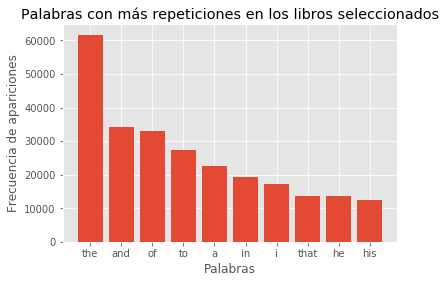

In [2]:
# Función para realizar conteo de palabras y frecuencias
def conteoPalabras(nombreArchivo):
    nLineas = 0
    nPalabras = 0
    cuenta_palabras = dict()
    corpus = open('./'+nombreArchivo, 'r')
    for linea in corpus:
        nLineas += 1
        for palabra in linea.split():
            nPalabras += 1
            # Contabilizar palabras
            if palabra in cuenta_palabras:
                cuenta_palabras[palabra] += 1
            else:
                cuenta_palabras[palabra] = 1
    corpus.close()
    return cuenta_palabras, nLineas, nPalabras
      
cuenta_palabras, nLineas, nPalabras = conteoPalabras('corpus.txt')
df = pd.DataFrame(list(cuenta_palabras.items()), columns=('palabra', 'frecuencia'))
df.sort_values(by=['frecuencia'], ascending=False, inplace=True)

# Graficar
style.use('ggplot')
plt.bar(df.head(10)['palabra'].tolist(), df.head(10)['frecuencia'].tolist(), align='center')
plt.title('Palabras con más repeticiones en los libros seleccionados')
plt.ylabel('Frecuencia de apariciones')
plt.xlabel('Palabras')
plt.show()

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

Para ello, se tomaron los diez libros seleccionados como corpus, simulando un libro más grande. Sobre las palabras podemos decir que las que más se repiten son artículos o pronombres, es decir, palabras que se utilizan para componer oraciones por sobre palabras que conlleven contenido (stopwords).

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

In [3]:
cuenta_rara = 0
total = 0
# Realizar conteo de palabras raras y palabras totales
for palabra in cuenta_palabras:
    cuenta_pal_actual = cuenta_palabras[palabra]
    if cuenta_pal_actual == 1:
        cuenta_rara += 1
    total += cuenta_pal_actual
probabilidad = round(cuenta_rara/total, 5)
print('La probabilidad de obtener una palabra rara es de: ', probabilidad)

La probabilidad de obtener una palabra rara es de:  0.01858


Como se puede ver, hay una muy baja probabilidad de obtener una palabra rara con aproximadamente un 1,86%; lo que concuerda con el crecimiento de libre escala, en donde las palabras más comunes crecen más, aislando las palabras raras.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

Para ello se dividirá el texto en tamaños de distinto largo (según la cantidad de palabras) y cinco $N$ arbitrarios, se contará las palabras raras del texto y así verificar si se logra encontrar al menos $N$ palabras raras, para luego obtener la probabilidad según lo éxitos obtenidos en cada parte y el total de las partes. Con dichos valores: los largos utilizados y la probabilidad encontrada se buscará el coeficiente de correlación de Pearson para determinar la existencia de relación entre ambas variables.

Cantidad de palabras del corpus original:  1097499
[7.  7.5 8.  8.5 9. ]
[ 9.    9.75 10.5  11.25 12.  ]
[12.  16.5 21.  25.5 30. ]
[30.  37.5 45.  52.5 60. ]
132209 156785
132209 156785
133432 137187
133432 137187
117938 121944
117938 121944
117938 121944
108491 109749
98693 99772
90975 91458
90975 91458
68479 68593
52224 52261
43875 43899
36571 36583
36571 36583
29658 29662
24386 24388
21103 21105
18289 18291


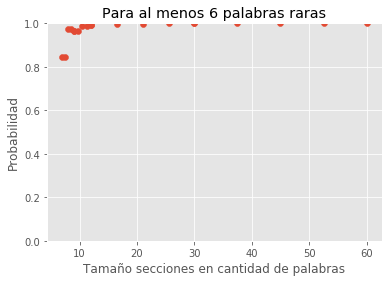

Resultando en un coeficiente de correlación de:  0.4517
[17.   18.75 20.5  22.25 24.  ]
[24. 26. 28. 30. 32.]
[32. 44. 56. 68. 80.]
[ 80. 100. 120. 140. 160.]
17504 64558
34832 60972
41030 54874
42683 49886
42000 45729
42000 45729
40230 42211
38106 39196
35955 36583
33879 34296
33879 34296
24902 24943
19582 19598
16136 16139
13717 13718
13717 13718
10973 10974
9144 9145
7839 7839
6859 6859


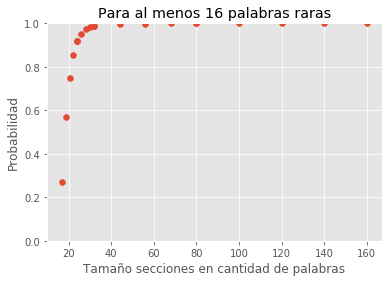

Resultando en un coeficiente de correlación de:  0.4368
[46.    51.375 56.75  62.125 67.5  ]
[67.5   73.125 78.75  84.375 90.   ]
[ 90.   123.75 157.5  191.25 225.  ]
[225.   281.25 337.5  393.75 450.  ]
12 23858
316 21519
1474 19598
4284 17701
7023 16380
7023 16380
9426 15034
10681 14070
11180 13065
11128 12194
11128 12194
8827 8922
6976 6990
5746 5746
4877 4877
4877 4877
3905 3905
3256 3256
2792 2792
2438 2438


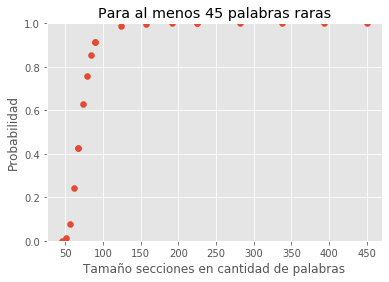

Resultando en un coeficiente de correlación de:  0.6421
[ 73.    81.75  90.5   99.25 108.  ]
[108. 117. 126. 135. 144.]
[144. 198. 252. 306. 360.]
[360. 450. 540. 630. 720.]
0 15034
3 13549
58 12194
394 11085
1183 10162
1183 10162
2431 9380
3767 8710
4832 8129
5500 7621
5500 7621
5363 5542
4311 4355
3574 3586
3046 3048
3046 3048
2438 2438
2032 2032
1742 1742
1524 1524


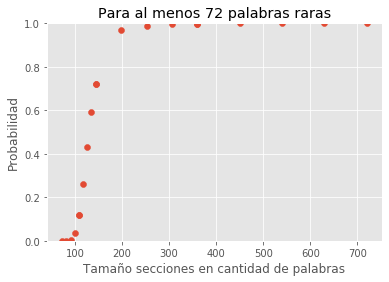

Resultando en un coeficiente de correlación de:  0.75
[148.    166.125 184.25  202.375 220.5  ]
[220.5   238.875 257.25  275.625 294.   ]
[294.   404.25 514.5  624.75 735.  ]
[ 735.    918.75 1102.5  1286.25 1470.  ]
0 7415
0 6611
0 5964
8 5433
29 4988
29 4988
108 4611
262 4270
493 3990
794 3732
794 3732
2098 2716
2034 2135
1719 1758
1474 1493
1474 1493
1188 1195
995 995
853 853
746 746


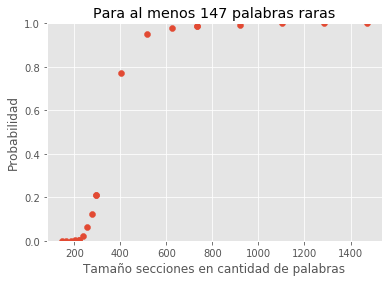

Resultando en un coeficiente de correlación de:  0.8456
[303.  340.5 378.  415.5 453. ]
[453.   490.75 528.5  566.25 604.  ]
[ 604.   830.5 1057.  1283.5 1510. ]
[1510.  1887.5 2265.  2642.5 3020. ]
0 3622
0 3227
0 2903
0 2644
1 2422
1 2422
2 2239
8 2078
32 1939
64 1817
64 1817
448 1322
683 1038
737 855
695 726
695 726
574 581
481 484
415 415
363 363


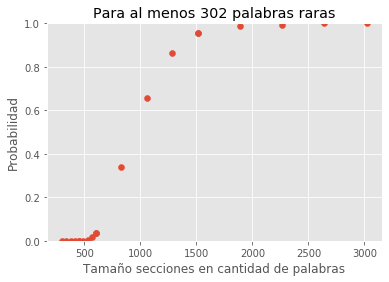

Resultando en un coeficiente de correlación de:  0.903
[501.   563.25 625.5  687.75 750.  ]
[ 750.   812.5  875.   937.5 1000. ]
[1000. 1375. 1750. 2125. 2500.]
[2500. 3125. 3750. 4375. 5000.]
0 2190
0 1949
0 1755
0 1597
1 1463
1 1463
1 1351
1 1254
4 1171
9 1097
9 1097
95 798
250 627
306 516
327 438
327 438
322 351
287 292
250 250
219 219


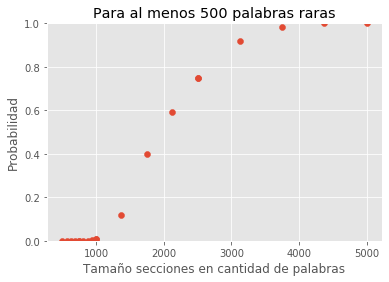

Resultando en un coeficiente de correlación de:  0.9561
[ 676.     760.125  844.25   928.375 1012.5  ]
[1012.5   1096.875 1181.25  1265.625 1350.   ]
[1350.   1856.25 2362.5  2868.75 3375.  ]
[3375.   4218.75 5062.5  5906.25 6750.  ]
0 1623
0 1444
0 1300
0 1182
0 1084
0 1084
0 1001
0 929
1 867
2 812
2 812
50 591
121 464
171 382
188 325
188 325
202 260
199 216
182 185
162 162


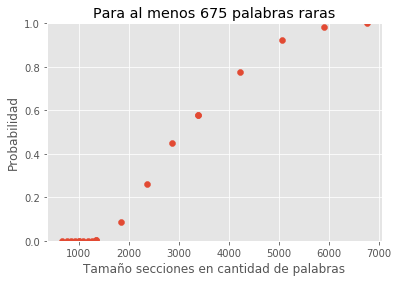

Resultando en un coeficiente de correlación de:  0.9808


In [4]:
print("Cantidad de palabras del corpus original: ", nPalabras)

# Función para contar palabras y frecuencias según cierto tamaño de secciones
# en cantidad de palabras
def cuentaPalabras(tamPalabras):
    cuenta_parte = dict()
    palabrasLeidas = 0
    cantidad_raras = list()
    corpus = open('./corpus.txt', 'r')
    for linea in corpus:
        for palabra in linea.split():
            # Contabilizar palabras
            if palabra in cuenta_parte:
                cuenta_parte[palabra] += 1
            else:
                cuenta_parte[palabra] = 1
            palabrasLeidas += 1
            # Finalizar revisión parte actual
            if palabrasLeidas == (tamPalabras):
                cuenta_rara = 0
                # Conteo palabras raras
                for palabra in cuenta_parte:
                    cuenta_pal_actual = cuenta_parte[palabra]
                    if cuenta_pal_actual == 1:
                        cuenta_rara += 1
                # Calcular resultado
                cantidad_raras.append(cuenta_rara)
                # Resetear variables
                cuenta_parte.clear()
                palabrasLeidas = 0
    corpus.close()
    df_probs = pd.DataFrame(cantidad_raras, columns = ['nRaras'])
    #display(df_probs)
    return df_probs

avgProbabilidades = list()
#largoPartesEnPalabras = [1000, 5000, 10000, 15000, 25000]
#***
nPalabrasRaras = [6, 16, 45, 72, 147, 302, 500, 675]
#***
#nPalabrasRaras = [3, 5, 12, 21, 33]
#largoPartesEnPalabras = [3, 5, 10, 20, 100, 500, 1000]
#largoPartesEnPalabras = np.concatenate((range(8,20,1),range(20, 50, 2),range(50,100,10)))

def analizarN(n):
    #largoPartesEnPalabras = np.concatenate((range(int(n*1.3), int(n*1.7), 2), range(int(n*1.7), int(n*5), 10), ))
    # Selección de tamaño en función del N
    rango1 = np.linspace(n+1, 1.5*n, 5)
    rango2 = np.linspace(1.5*n, 2*n, 5)
    rango3 = np.linspace(2*n, 5*n, 5)
    rango4 = np.linspace(5*n, 10*n, 5)
    print(rango1)
    print(rango2)
    print(rango3)
    print(rango4)
    largoPartesEnPalabras = np.concatenate((rango1, rango2, rango3, rango4))
    probabilidades = []
    for largo in largoPartesEnPalabras:
        # Contar palabras
        df_aux = cuentaPalabras(int(largo))
        # Analizar exitos
        df_aux2 = df_aux['nRaras'].apply(lambda x: 0 if x<n else 1)#x/largo)
        # Calcular promedio total para al menos n palabras raras
        exitos = df_aux2.sum()
        nPartes = df_aux2.count()
        print(exitos, nPartes)
        probabilidades.append(exitos/nPartes)
    # Graficar
    plt.scatter(largoPartesEnPalabras, probabilidades)
    axes = plt.gca()
    axes.set_ylim([0, 1])
    #axes.set_xlim([0, 1000])
    plt.title('Para al menos '+str(n)+' palabras raras')
    plt.xlabel('Tamaño secciones en cantidad de palabras')
    plt.ylabel('Probabilidad')
    #plt.xscale('log')
    plt.show()
    # Cálculo coef correlacion
    correlacion = np.corrcoef(largoPartesEnPalabras, probabilidades)
    print('Resultando en un coeficiente de correlación de: ', round(correlacion[0][1],4))
    probabilidades.clear()
    
for n in nPalabrasRaras:
    analizarN(n)

Es importante discutir en primer lugar sobre las diferencias de los gráficos. Éstas se generan principalmente debido a la importancia de los $N$ y los tamaños escogidos, según el crecimiento de los gráficos y la evidencia encontrada, después de cierto tamaño de las partes leídas se garantiza que siempre se encontrará al menos $N$ palabras raras y los gráficos se mantienen constantes. Es por ello que no tiene sentido comparar gráficos de la misma escala, ya que los tamaños a utilizar son útiles para el orden de cada $N$ específico. Para dicho proósito se escogieron tamaños en función de cierto porcentaje de $N$.

En base a los coeficientes de correlación obtenidos, existe una relación positiva entre el tamaño de las partes escogidas y la probabilidad de encontrar $N$ palabras raras, es decir, si se busca en secciones más grandes, en más probable encontrar al menos $N$ palabras raras.

Si comparamos con b), se puede notar que son casos distintos, ya que en la pregunta b), se está evaluando la proporción de cantidad de palabras raras con respecto al total, lo que depende directamente de la frecuencia de las palabras no raras y que aumentan más su frecuencia. Por otro lado, en la pregunta c), se relaciona la cantidad de palabras raras con respecto al largo del texto elegido, es decir, para este caso no afecta realmente las palabras que no sean raras, así, al aumentar el tamaño, es más probable que los éxitos aumenten, a diferencia de b). Si lo vemos como un grafo en el cual los nodos son las palabras y sus aristas las frecuencias asociadas, esta pregunta correspondería a agregar nodos (es más probable unirlos a los de mayor frecuencia) y ver si aumentan los nodos aislados, en cambio e

[2.    1.875 1.75  1.625 1.5  ]
[1.5   1.625 1.75  1.875 2.   ]
[2.   2.75 3.5  4.25 5.  ]
[ 5.    6.25  7.5   8.75 10.  ]
547931 548749
1097499 1097499
1097499 1097499
1097499 1097499
1097499 1097499
1097499 1097499
1097499 1097499
1097499 1097499
1097499 1097499
547931 548749
547931 548749
547931 548749
365733 365833
274248 274374
219461 219499
219461 219499
182879 182916
156767 156785
137165 137187
109737 109749


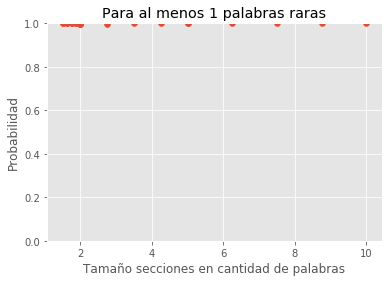

Resultando en un coeficiente de correlación de:  0.1838


In [5]:
analizarN(1)

In [6]:
cuenta_palabras
df = pd.DataFrame(cuenta_palabras.items(), columns=['Palabra', 'Frecuencia'])
df.sort_values(by='Frecuencia', inplace=True)
df[(df.Frecuencia>5)].sort_values(by='Frecuencia', ascending=False).head(4000000)

,Palabra,Frecuencia
12,the,61719
20,and,34266
14,of,32874
78,to,27361
127,a,22520
115,in,19309
102,i,17252
89,that,13732
276,he,13679
280,his,12534


In [7]:
print(nPalabras)
cuentaPalabras(nPalabras)

1097499


,nRaras
0,20394


**D)**

1.0 5.0


0.024302527838294157

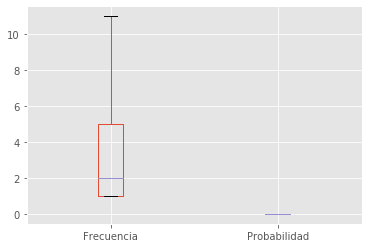

In [25]:
'''covar = df_prob_tam.cov()['Probabilidad promedio'][0]
x = df_prob_tam['Cantidad palabras'].std()
y = df_prob_tam['Probabilidad promedio'].std()
res = covar/(x*y)
res'''
df['Probabilidad'] = df['Frecuencia']/nPalabras
p_25 = df.Frecuencia.quantile(0.25)
p_75 = df.Frecuencia.quantile(0.75)
df_filtrado = df[(df['Frecuencia'] >= p_25) & (df['Frecuencia'] <= p_75)]
bins = [0,10,20,30,40,50,60,70,80,90,100]
#display(df_filtrado)
print(p_25, p_75)
df.boxplot(showfliers=False)
df_aux = df[df.Frecuencia == 2].count()
#df_aux = df.sum()
df_aux
(20394+6278)/1097499
#df
#plt.hist(df['Frecuencia'], bins=[0,1,2,10,50,100,1000])
#plt.show()

In [9]:
df['Frecuencia']

44783        1
30878        1
30881        1
30882        1
15222        1
30883        1
30887        1
15217        1
30888        1
30890        1
30892        1
15211        1
15210        1
15209        1
15208        1
15207        1
15206        1
15205        1
30877        1
15204        1
30876        1
15231        1
15250        1
15248        1
15247        1
30859        1
15245        1
15244        1
30860        1
15242        1
         ...  
97        4857
137       5092
3         5311
265       5867
162       6014
759       6072
106       6301
288       6389
17        6469
382       6577
224       6914
210       6992
809       7069
10        7399
123       8200
25        8477
11        8548
21        9886
367      11530
28       12038
280      12534
276      13679
89       13732
102      17252
115      19309
127      22520
78       27361
14       32874
20       34266
12       61719
Name: Frecuencia, Length: 44784, dtype: int64

# 2. MCMC Decryption (40p)

La seguridad es un tema que desde tiempos inmemoriables ha sido utilizado en el envío de mensajes. Desde el *shift* de letras en $x$ posiciones hasta algoritmos complejos de encriptación que tienen a los computadores años intentando descifrarlos. Uno de los algoritmos utilizados para encriptar corresponde al de sustitución. Este algoritmo consiste en tener un hash con los pares (llave, valor) donde la letra que corresponde a la llave se reemplaza por la letra que corresponda a valor. Por ejemplo: 


```Python

Llave = "ITBLPHWZAREJXNFVOUDMCGYKQS"

Mensaje_Original = "Hola ¿qué tal?"

Mensaje_Encriptado = "ZFJI OCP MIJ"  #(notar que se ignoró puntuación y tilde)

Llave_Desencriptacion = "ICUSKOVFALXDTNQEYJZBRPGMWH"

```


#### ¿Cómo interpretar la llave? 

Dada una llave de la forma $x_{1}x_{2}x_{3}\dots x_{n}$ con $n$ largo del alfabeto inglés (A hasta Z sin Ñ)
la primera letra reemplazará a la "A", la segunda a "B", la tercera a "C" y así hasta la "Z". 

**Ejemplo pequeño:** 

"ABCD" lo encriptaré con la siguiente llave "CADB", la llave para desencriptar el mensaje es la siguiente "BDAC".

1. Encripto "CADA" con "CADB" $\rightarrow$ "DCBC"
2. Descencripto "DCBC" con "BDAC" $\rightarrow$ "CADA"

Esta será la nomenclatura que se utilizará al momento de presentar las llaves. 

#### Problema

A usted le han entregado un texto encriptado mediante sustitución, pero no conoce la llave que se utilizó originalmente para encriptarlo. Un enfoque fuerza bruta para descifrarlo implica que usted probará las $26!$ posibles combinaciones para desencriptar el texto. Claramente, probar semejante cantidad lo tendrá esperando una respuesta hasta mucho después de la fecha de entrega del laboratorio. 

Para resolver este problema se le plantea un método muy útil para resolver este problema en un tiempo mucho más prudente: cadenas de Markov con el método de Montecarlo (MCMC). El procedimiento es el siguiente: 

##### 1. Analizar Texto del idioma original

Es necesario tener una noción de la estructura del lenguaje origen del mensaje. Descifrar un mensaje en chino (5000 caractes que se utilizan en la vida diaria aprox) o descifrar un mensaje en inglés (26 letras solamente) no
utilizarán el mismo criterio para detectar estructura. 

En este caso trabajará con el idioma inglés y deberá buscar un texto en inglés bastante extenso (Corpus) o compilado de textos extensos para analizar las frecuencias. Para el idioma inglés se sugiere contar las frecuencias de a pares de caracteres, solamente utilice las 26 letras y el espacio " " para contar frecuencias.
Por ejemplo: "AH"," A", "A ", "BA", (el orden de aparición si importa en este caso). 

Recuerde que para los lenguajes de programación "a" y "A" no son lo mismo, pero para efectos del desencriptado sí.

#### 2. Métrica de Desempeño 

El método que se proponE consiste en probar llaves de desencriptación aleatorias. Si no se define una forma para comparar una propuesta de otra, se tendrá el mismo proceso que el de probar todas las posibilidades hasta achuntarle. Se creará una métrica de desempeño que asigne un puntaje a cierta llave para ir optando por llaves que tiendan a un mayor puntaje.

La métrica que se sugiere es:

$$
 Puntaje = \prod Frecs("Par")^{Ocurrencias("Par")}
$$

Donde "Frecs("Par")" corresponde a la frecuencia del par ("AH" por ejemplo) en el análisis de texto realizado en el paso 1 y "Ocurrencias("Par")" corresponde a la frecuencia de dicho par **en el texto desencriptado con la llave propuesta**. Para facilitar los cálculos es recomendable utilizar $log(Puntaje)$ como métrica final. La métrica sugerida es proporcional a la máxima verosimilitud.

#### 3. Decisiones 

Para decidir si nos quedaremos con la solución actual o la solución propuesta haremos lo siguiente: 

* Si el puntaje de la solución actual es menor que el de la solución propuesta, nuestra propuesta actual será actualizada por la solución propuesta para la siguiente iteración. 

* Si el puntaje de la solución actual es mayor que el de la solución propuesta, se tirará una moneda cuya probabilidad de **cara** sea $\frac{Score\,Propuesta}{Score\,Actual}$, si sale cara optaremos por la solución propuesta.

#### 4. Procedimiento 

1. Elegimos alguna llave para desencriptar inicial, la que se quiera.
2. La llave propuesta será una variación de la llave actual permutando 2 elementos de ésta. 
3. Se toman las decisiones como el punto "Decisiones" indica. 
4. Repetir 2 y 3 varias veces. Se recomienda iterar 10000 veces o mas.
5. Terminadas las iteraciones se retornar el texto desencriptado junto a la llave de desencriptación.

>**Importante:** Es posible que al desencriptar el mensaje su resultado final no parezca tener sentido aunque
tenga todo bien programado. Esto es debido al azar así que corra su algoritmo unas cuantas veces si el primer
resultado no parece tener sentido antes de corregir el código. (En mis intentos, por lo general unas 3-5 veces era suficiente si no funcionaba a la primera). 


* Los textos encriptados que se le han facilitado se encuentran en el archivo "cifrados.txt"
* Los textos 1, 2 y 3 fueron encriptados utilizando la misma llave.
* El texto 4 es el mismo mensaje del texto 1 pero encriptado con otra llave.
* El texto 2 fue escrito originalmente en español (se reemplazó Ñ por N para mantener el tamaño del alfabeto) y los textos 1, 3 y 4 en inglés.

>a) Analice la métrica de desempeño y explique lo que intenta lograr ¿Qué es lo que se premia? 

>b) Desencripte el texto 1 utilizando el método explicado. 

>c) Desencripte el texto 2 utilizando el método explicado y el **análisis de texto en inglés**. De lo que obtuvo ¿Qué puede decir acerca de desencriptar un lenguaje distinto del analizado? ¿Qué puede decir acerca de la estructura de ambos lenguajes?

>d) Desencripte el texto 3 utilizando el método explicado. *Hint: Texto 1*.

>e) Desencripte el texto 4 utilizando el método explicado. Compare con lo obtenido en b) ¿La llave que se utiliza para encriptar tiene importancia en el resultado?

>f) ¿A qué se debe que al correr varias veces su algoritmo se pueda obtener un mensaje entendible, pero con distintas llaves de desencriptación? ¿Qué puede decir acerca del método, es determinista o estocástico? 

>g) **Bonus +5** Plantee una estrategia para desencriptar el texto 2 que está en español. Obtendrá otros 5 puntos si logra desencriptarlo, pero recuerde que la Ñ se reemplazó por N.

---
Es posible que al descifrar le quede un mensaje con pequeños errores, por ejemplo, "HSTO NO CONCUHRDA", si este es su caso, puede intentar sacar el mensaje original haciendo estas correcciones a mano. 

---

**Desarrollo 2**


In [10]:
archivo = open('cifrados.txt', 'r')
texto_1 =[]
texto_2 =[]
texto_3 =[]
texto_4 =[]
for linea in archivo:
    linea = linea.strip()
    if linea == "Texto 1":
        linea= archivo.readline()
        texto_1.append(linea.strip())
    if linea == "Texto 2":
        linea = archivo.readline()
        texto_2.append(linea.strip())
    if linea == "Texto 3":
        linea = archivo.readline()
        texto_3.append(linea.strip())
    if linea == "Texto 4":
        linea = archivo.readline()
        texto_4.append(linea.strip())


## 3. Regresión Lineal y Bootstrap (30p)

### Introducción a Método Bootstrap

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

Una forma de construir intervalos de confianza con el método bootstrap es utilizar los percentiles. Si queremos un intervalo de 90% de confianza, utilizamos un intervalo **simétrico** que vaya desde el percentil $X$ hasta el percentil $Y$ de manera que $Y-X = 0.90$. En el ejemplo anterior serían los percentiles 5% y 95%.

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

### El problema

Usted cuenta con un registro histórico del clima de Szeged, Hungría. Tiene datos comprendidos entre el 2006 y 2016, entre ellos están la temperatura (en °C), la humedad, velocidad del viento (Km/h) y la presión (milibar). Usted trabajará con las 4 columnas mencionadas e intentará encontrar alguna relación entre estas variables.

[Dataset aqui](https://www.kaggle.com/budincsevity/szeged-weather)

> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

> b) Construya un modelo de regresión lineal donde se utilice la temperatura para predecir la humedad, indique los valores del coeficiente de posición y la pendiente.

> c) Construya un intervalo de confianza del 95% para el coeficiente de posición, sin utilizar bootstrap. Construya el mismo intervalo con el método bootstrap utilizando tamaños $\frac{N}{2}$ y $N$ , ambos se deben realizar $2000$ veces. Compare los 3 intervalos y comente.

*Hint: Hay varios modelos involucrados*

> d) Un amigo suyo que había trabajado previamente con este conjunto de datos le dijo que no existía relación lineal entre la temperatura y la humedad. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia. 

*Hint: Tiene que ver con la pendiente*

> e) Su amigo también le dijo que no existía una relación lineal entre la temperatura y la presión. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia.

> f) Calcule el [mse](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) del modelo obtenido en b). Se le ha propuesto la opción de realizar 3 modelos utilizando 3 intervalos de temperatura: 

* $\left(-\infty,0\right]$
* $ \left(0,20\right]$
* $\left(20,+\infty \right]$

Utilizando el método propuesto calcule el nuevo $ MSE^{*} = MSE_1 + MSE_2 + MSE_3$ y compárelo con el $MSE_b$ (el de b). ¿Es esta propuesta mejor o peor que la realizada con anterioridad?



**Desarrollo 3**


Se procede a calcular el coeficiente de correlación entre todos los pares posibles de las cuatro columnas mencionadas, este coeficiente se calculará bajo la siguiente fórmula:

$$
\rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}
$$

El valor del coeficiente de correlación entre el par de datos X,Y , indicará el tipo de relación de estos, de la siguiente forma:

*  Si r = 1, existe una correlación positiva perfecta. Relación **directa**
*  Si 0 < r < 1, existe una correlación positiva.
*  Si r = 0, no existe relación lineal. **Variables son independientes**
*  Si -1 < r < 0, existe una correlación negativa.
*  Si r = -1, existe una correlación negativa perfecta. Relación **inversa**

**Nota:** Si $\operatorname{cov}(X, Y) = 0 \Rightarrow  \rho_{X,Y} = 0$
**Nota 2:** Si $\operatorname{cov}(X, Y) \Leftrightarrow \operatorname{cov}(Y, X) $


In [11]:
#leemos el archivo:
we = pd.read_csv("weatherHistory.csv")

#columnas
t = we['Temperature (C)'] #temperatura
h = we['Humidity'] #humedad
v = we['Wind Speed (km/h)'] #velocidad viento
p = we['Pressure (millibars)'] #presion

#definimos la funcion para el coef de correlación
def coef_correlacion(x,y):
    cov_xy = np.cov(x,y)[0][1]
    if cov_xy == 0:
        return 0
    else:
        var_x = np.var(x)
        var_y = np.var(y)
        den = np.sqrt(var_x)* np.sqrt(var_y)
        return cov_xy/den

#Calculamos el coeficiente de correlacion para los pares posibles: (t,h) (t,v) (t,p) (h,v) (h,p) (v,p)

print("Coeficientes de correlación\n")
print("Temperatura y Humedad            " + str(coef_correlacion(t,h))) 
print("Temperatura y Velocidad viento   " + str(coef_correlacion(t,v)))
print("Temperatura y Presión            " + str(coef_correlacion(t,p)))
print("Humedad y Velocidad viento       " + str(coef_correlacion(h,v)))
print("Humedad y Presión                " + str(coef_correlacion(h,p)))
print("Velocidad viento y Presión       " + str(coef_correlacion(v,p)))

Coeficientes de correlación

Temperatura y Humedad            -0.6322612301502698
Temperatura y Velocidad viento   0.00895706120821777
Temperatura y Presión            -0.005447162626738276
Humedad y Velocidad viento       -0.22495378814302325
Humedad y Presión                0.005454319810932256
Velocidad viento y Presión       -0.04926331626060574


> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

Según los valores de coeficiente de correlación presentados podemos concluir lo siguiente:

*  Relación **inversa** entre temperatura y humedad
*  Relación **directa** (NO EXISTE) entre temperatura y velocidad del viento
*  Relación **indirecta** (NO EXISTE) entre temperatura y presión
*  Relación **inversa** entre humedad y velocidad de viento
*  Relación **directa** (NO EXISTE) entre temperatura y humedad
*  Relación **inversa** entre temperatura y humedad


## Bonus Section 

### B.1 NLP (+10)

Natural Language Processing (NLP) corresponde al análisis del lenguaje natural para realizar estudios acerca de: análisis de sentimiento, patrones del discurso en la voz para los asistentes (Ok google, Alexa, etc.), entre otros. Debido a su utilidad y complejidad, creó su propia area de inteligencia artificial. En esta sección usted trabajará con algunos aspectos básicos de NLP.

Dentro del análisis de patrones en el texto hay una técnica que se llama *Pos Tagging* (Parts of Speech tagging) que corresponde a la asignación de un *tag* a una palabra, estos tags son: sustantivo, verbo, adeverbio, etc. 

Trabajára con las relaciones "antes de" y "después de", es decir, utilizará alguna estructura de datos conveniente para almacenar las palabras que vienen antes de $X$ y las que vienen después de $X$.


> a) Determine las probabilidades del *tag* sucesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los 3 tags de mayor frecuencia.

> b) Determine las probabilidades del *tag* antecesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los mismos tags de e) y comente. ¿Hay alguna relación con lo trabajado en e)?

Puede trabajar con 1 solo texto en esta sub-sección, si lo prefiere.

----

* [POS Tagging en Python](https://www.nltk.org/book/ch05.html)
* [POS Tagging en R](https://smart-statistics.com/part-speech-tagging-r/)

### B.2 Redes Complejas ft. TLC (+10)

En el laboratorio 2 usted conoció un tipo de modelo para generar redes complejas de libre escala. En este laboratorio se le presenta otro tipo de modelo, un poco más básico, cuyo proceso de generación es el siguiente:

1. Se inicializa la red con una cantidad fija de nodos $N$ 
2. Entre cada par de nodos existe una probabilidad $\rho$ de colocar una arista entre cada par de nodos.

Este proceso puede hacerse tanto de forma dirigida como no dirigida. 

#### Teorema del Límite Central 

El teorema del límite central es uno de los postulados más importantes de estadística.

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección comprobaremos el TLC utilizando el grafo descrito al inicio.

>a) Considerando la construcción del grafo ¿A qué distribución corresponde el proceso?

>b) En este caso nos interesa la distribución de **Grado Promedio**. En base a lo enunciado en el TLC identifique:

* Elementos de la muestra Aleatoria.
* La media de la distribución de grado promedio
* La varianza/std de la distribución de grado promedio.

Tanto para el caso **dirigido** como el **no dirigido**. En el caso dirigido se refiere a grado promedio de entrada y grado promedio de salida.


>c) Utilizando un $\rho$ fijo (a su elección, pero distinto de 0 y 1) genere la distribución de grado utilizando:

* 1000 grafos de 5 nodos
* 1000 grafos de 50 nodos
* 1000 grafos de 500 nodos
* 1000 grafos de 1000 nodos

**SOLO EN CASO NO DIRIGIDO**

Comparando los resultados obtenidos con su respuesta en b) ¿Es posible concluir que el teorema del límite central se cumple tanto para el grafo dirigido como no dirigido?


## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ En esta ocasión se podrán realizar consultas hasta el 4 de noviembre a las 15:00h.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)